1. Plot the relationship between galaxy sizes and galaxy stellar mass (and/or halo mass).

In [1]:
import illustris_python as il
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
basePath = '../sims.TNG/TNG100-1/output/'

In [3]:
fields = ['SubhaloLenType', 'SubhaloHalfmassRadType', 'SubhaloMassInRadType']
sub_halos = il.groupcat.loadSubhalos(basePath, 99, fields=fields)

In [4]:
sub_halos['SubhaloLenType'][:, 4]

array([3987343,  594757,  667477, ...,       0,       0,       0],
      dtype=int32)

In [5]:
tot = len(sub_halos['SubhaloLenType'][:, 4])
print(tot)

4371211


In [6]:
np.count_nonzero(sub_halos['SubhaloLenType'][:, 4]), np.count_nonzero(sub_halos['SubhaloHalfmassRadType'][:, 4]), np.count_nonzero(sub_halos['SubhaloMassInRadType'][:, 4]),

(337261, 212929, 212929)

In [7]:
count = 0
index = []
index_zero = []
for i in range(tot):
    if sub_halos['SubhaloMassInRadType'][i, 4] != 0:
        index.append(i)
        count += 1
    else:
        index_zero.append(i)

In [8]:
count, len(index), len(index_zero), (len(index) + len(index_zero)) == tot, index == np.nonzero(sub_halos['SubhaloMassInRadType'][:, 4])

(212929, 212929, 4158282, True, False)

In [9]:
nz = np.nonzero(sub_halos['SubhaloMassInRadType'][:, 4])

In [10]:
n = list(nz[0])

In [11]:
index == n

True

In [12]:
no_mat1 = 0
for i in range(len(index)):
    if sub_halos['SubhaloMassInRadType'][index[i], 4] == 0:
        no_mat1 += 0
        
no_mat1

0

In [13]:
no_mat2 = 0
for i in range(len(index)):
    if (sub_halos['SubhaloHalfmassRadType'][index[i], 4]) == 0:
        no_mat2 += 0
        
no_mat2

0

In [14]:
np.count_nonzero(sub_halos['SubhaloMassInRadType'][index[i], 4])

1

In [15]:
len(sub_halos['SubhaloHalfmassRadType'][:, 4]), np.count_nonzero(sub_halos['SubhaloHalfmassRadType'][:, 4])

(4371211, 212929)

All the subhalos containing no stellar components have no stellar radius and no stellar mass

In [16]:
galaxy_stellar_mass = []

for i in range(len(index)):
    galaxy_stellar_mass.append(sub_halos['SubhaloMassInRadType'][index[i], 4])

    
len(galaxy_stellar_mass), np.count_nonzero(galaxy_stellar_mass) # To check if the for loop is correct

(212929, 212929)

In [17]:
galaxy_size = []

for i in range(len(index)):
    galaxy_size.append((sub_halos['SubhaloHalfmassRadType'][index[i], 4] * 2))

Here, the factor 2 is multiplied as the radius was for half stellar mass

In [18]:
mpl.rcParams['agg.path.chunksize'] = 10000 # Required while plotting a large number of points 
mpl.rcParams['path.simplify_threshold'] = 1.0

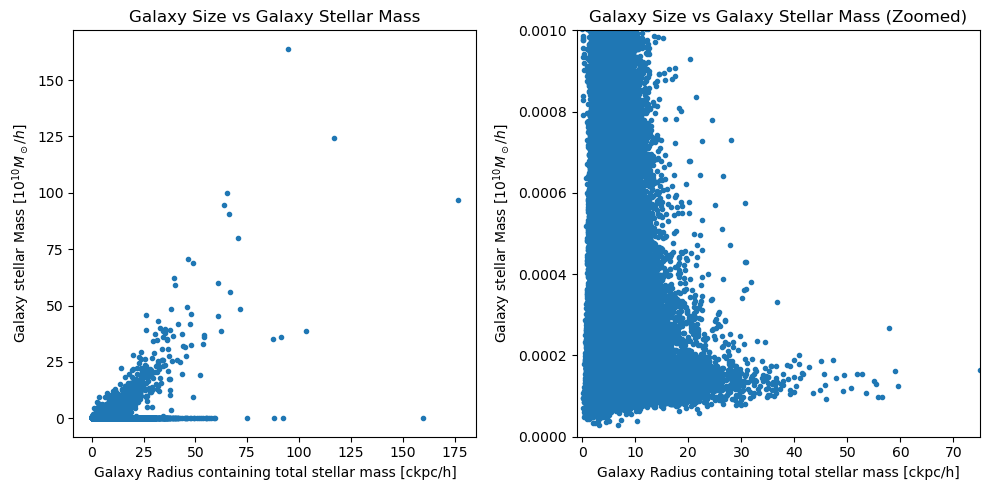

In [19]:
fig = plt.figure(figsize=(10,5)) 
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

ax1.plot(galaxy_size, galaxy_stellar_mass, '.')
ax1.set_ylabel('Galaxy stellar Mass [$10^{10} M_\odot/h$]')
ax1.set_xlabel('Galaxy Radius containing total stellar mass [ckpc/h]')
ax1.set_title('Galaxy Size vs Galaxy Stellar Mass')

ax2.plot(galaxy_size, galaxy_stellar_mass, '.')
ax2.set_ylabel('Galaxy stellar Mass [$10^{10} M_\odot/h$]')
ax2.set_xlabel('Galaxy Radius containing total stellar mass [ckpc/h]')
ax2.set_title('Galaxy Size vs Galaxy Stellar Mass (Zoomed)')
ax2.set_xlim(-1, 75)
ax2.set_ylim(0, 0.001)

plt.tight_layout()
plt.show()

Most of the galaxies have masses below $25*10^{10}M_\odot$ and lie within $50 ckpc/h$

Since the len(galaxy_stellar_mass) is equal to the value of count above, no y value is equal to 0 although it appears so in the plot.

In [37]:
for i in range(len(galaxy_stellar_mass)):
    galaxy_stellar_mass[i] *= (1e10 / 0.6774)
    galaxy_size[i] *= (1e3 / 0.6774) # scale factor is 1 at z = 0

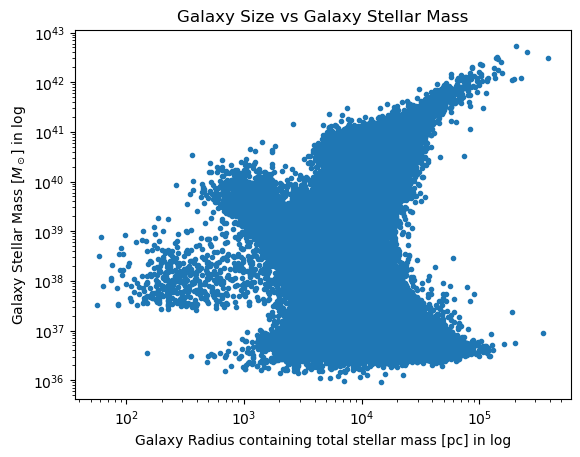

In [38]:
fig, ax = plt.subplots()

ax.plot(galaxy_size, galaxy_stellar_mass, '.')
ax.set_ylabel('Galaxy Stellar Mass [$M_\odot$] in log')
ax.set_xlabel('Galaxy Radius containing total stellar mass [pc] in log')
ax.set_title('Galaxy Size vs Galaxy Stellar Mass')
ax.set_yscale('log')
ax.set_xscale('log')

In [29]:
count = 0
for i in range(len(galaxy_stellar_mass)):
    if galaxy_stellar_mass[i] > 0:
        count += 1
        
count

212929

In [30]:
count == len(galaxy_stellar_mass)

True